In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 66, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 66 (delta 10), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (66/66), 13.84 MiB | 8.74 MiB/s, done.
Resolving deltas: 100% (15/15), done.


# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [ ]:
# 1
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace

df1 = pd.read_csv('/content/wrangling/assignment/data/airbnb_hw.csv',low_memory=False)
print(df1['Price'].describe()) # Price variable is an object type right now, not being read as a number

df1['Price'] = df1['Price'].str.replace("$", "") # Removes any "$" sign in values
df1['Price'] = df1['Price'].str.replace(",", "") # Removes any "," in values
df1['Price'] = df1['Price'].str.replace(" ", "") # Removes any extra spaces in values
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce') # Coerce the Price variable to numeric

print("Number of missing values:", df1['Price'].isnull().sum())

count     30478
unique      511
top         150
freq       1481
Name: Price, dtype: object
Number of missing values: 0


In [ ]:
# 2
df2 = pd.read_csv('/content/wrangling/assignment/data/mn_police_use_of_force.csv',low_memory=False)

# Find proportion of missing values
print(df2['subject_injury'].isnull().sum()/len(df2['subject_injury']))

# Around 76% of the data for subject injury is missing. This is concering, as this is more than three-quarters of the data set.

# Replace all missing values with "missing"
df2['subject_injury'] = df2['subject_injury'].fillna("Missing")

# Cross tabulate subject_injury and force_type
pd.crosstab(df2['subject_injury'], df2['force_type'])

0.7619342359767892


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
Missing,2,7051,1421,0,27,74,87,0,170,31,985
No,0,1093,131,2,33,34,0,1,0,2,150
Yes,2,1286,41,0,44,40,0,2,0,44,172


All of the subject injury data when the force type was "Maximal Restraint Technique" is missing. A large portion of the data is missing for the force types: bodily force, chemical irritant, taser.

In [ ]:
# 3
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df3 = pd.read_csv(url,low_memory=False) # Pandas downloads and loads the pretrial .csv file
print(df3["WhetherDefendantWasReleasedPretrial"].value_counts()) # 9 is a missing value
print("Missing values:", df3["WhetherDefendantWasReleasedPretrial"].isnull().sum()) # See how many missing values there are
df3["WhetherDefendantWasReleasedPretrial"] = df3["WhetherDefendantWasReleasedPretrial"].replace(9, np.nan) # Replace missing values with np.nan
print("Missing values:", df3["WhetherDefendantWasReleasedPretrial"].isnull().sum()) # Confirm that all the 9s were replaced with np.nan

WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
Missing values: 0
Missing values: 31


In [ ]:
# 4
print(df3["ImposedSentenceAllChargeInContactEvent"].value_counts())
print("Missing:", df3["ImposedSentenceAllChargeInContactEvent"].isnull().sum())
print("\n", df3["SentenceTypeAllChargesAtConvictionInContactEvent"].value_counts())
print("Missing:", df3["SentenceTypeAllChargesAtConvictionInContactEvent"].isnull().sum())
print("\n")
pd.crosstab(df3["ImposedSentenceAllChargeInContactEvent"], df3["SentenceTypeAllChargesAtConvictionInContactEvent"])

df3["ImposedSentenceAllChargeInContactEvent"].unique() # ImposedSentenceAllChargeInContactEvent variable not read as a number
df3["ImposedSentenceAllChargeInContactEvent"] = pd.to_numeric(df3["ImposedSentenceAllChargeInContactEvent"], errors='coerce') # Coerce the variable to numeric
df3["ImposedSentenceAllChargeInContactEvent"].describe() # ImposedSentenceAllChargeInContactEvent variable not read as a number
pd.crosstab(df3["ImposedSentenceAllChargeInContactEvent"], df3["SentenceTypeAllChargesAtConvictionInContactEvent"])

# If SentenceTypeAllChargesAtConvictionInContactEvent == 9, the information is missing
df3.loc[df3["SentenceTypeAllChargesAtConvictionInContactEvent"] == 9, "ImposedSentenceAllChargeInContactEvent"] = np.nan # Write missing ImposedSentenceAllChargeInContactEvent value for all cases where SentenceTypeAllChargesAtConvictionInContactEvent == 9
print("Missing:", df3["ImposedSentenceAllChargeInContactEvent"].isnull().sum())

# If SentenceTypeAllChargesAtConvictionInContactEvent == 0, sentence is 0 because there is no sentence for probation
df3.loc[df3["SentenceTypeAllChargesAtConvictionInContactEvent"] == 0, "ImposedSentenceAllChargeInContactEvent"] = 0 # Write 0 ImposedSentenceAllChargeInContactEvent value for all cases where SentenceTypeAllChargesAtConvictionInContactEvent == 0

# If SentenceTypeAllChargesAtConvictionInContactEvent == 4, sentence is 0 because the charges are pending, dismissed, deferred
df3.loc[df3["SentenceTypeAllChargesAtConvictionInContactEvent"] == 4, "ImposedSentenceAllChargeInContactEvent"] = 0 # Write 0 ImposedSentenceAllChargeInContactEvent value for all cases where SentenceTypeAllChargesAtConvictionInContactEvent == 4

ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64
Missing: 0

 SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64
Missing: 0


Missing: 9053


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [ ]:
# 1
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import pandas as pd  # Import the pandas package into your workspace
df = pd.read_excel("/content/sharkattack.xls")

# 2
print(df.head()) # See which columns do not contan data
print(df.columns)
columnsToDrop = ['pdf', 'href formula', 'href', 'Case Number', 'Case Number.1', 'original order', 'Unnamed: 21', 'Unnamed: 22']
df = df.drop(columns=columnsToDrop)
print(df.head())
print(df.shape)

                  Date    Year        Type           Country  \
0  2025-02-07 00:00:00  2025.0  Unprovoked  Turks and Caicos   
1  2025-02-03 00:00:00  2025.0  Unprovoked         Australia   
2  2025-01-23 00:00:00  2025.0  Unprovoked         Australia   
3  2025-01-22 00:00:00  2025.0  Unprovoked         Australia   
4  2025-01-11 00:00:00  2025.0    Provoked               USA   

               State                       Location  Activity  \
0                NaN            Thompson Cove Beach  Swimming   
1         Queensland   Woorim Beach, Bribie Island,  Swimming   
2  Western Australia                 Shipwreck Cove   Bathing   
3  Western Australia                 Cheynes beach    Surfing   
4             Hawaii  Off Haleiwa Boat Harbour Oahu    Diving   

                                     Name Sex Age  ...       Species   \
0                                Unknown    F  55  ...        Unknown   
1                          Charlize Zmuda   F  17  ...     Bull shark   
2    

count    6992.000000
mean     1935.044336
std       272.048128
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64
count    6863.000000
mean     1971.416290
std        60.719051
min         5.000000
25%      1950.000000
50%      1987.000000
75%      2010.000000
max      2026.000000
Name: Year, dtype: float64


array([[<Axes: title={'center': 'Year'}>]], dtype=object)

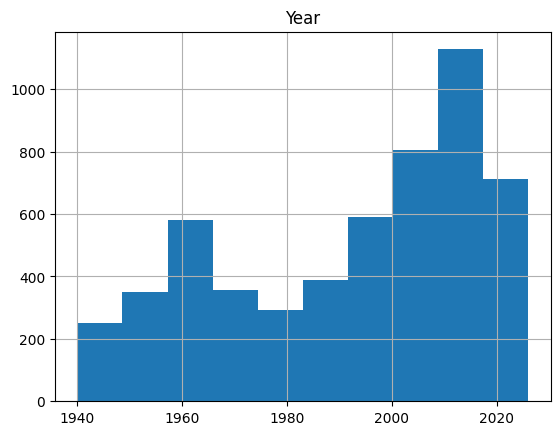

In [ ]:
# 3
print(df["Year"].describe())
# The year values range from 0 to 2026. If the year is 0, this means the data is missing since a year can't be 0.

df['Year'] = df['Year'].replace({0: np.nan})
print(df["Year"].describe()) # The 0 year values were replaced. The year values do not start at 0.

# Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
df_since1940 = df[df["Year"] >= 1940]
df_since1940["Year"].describe()
df_since1940.hist()
# Attachs are increasing over time.

object
float64


<Axes: >

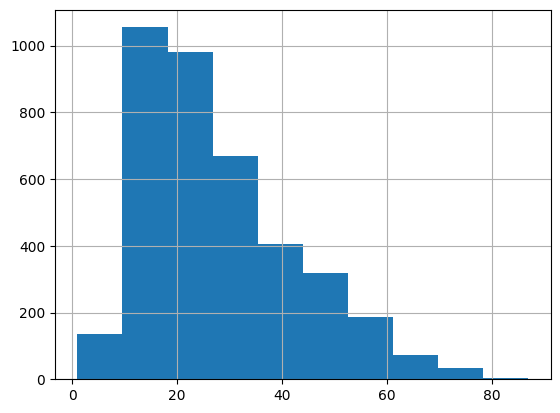

In [ ]:
# 4
# Clean the Age variable and make a histogram of the ages of the victims.
print(df["Age"].dtype) # Age is not being read as a number
df["Age"] = pd.to_numeric(df["Age"], errors='coerce') # Convert age variable to numeric
print(df["Age"].dtype) # Age is being read as a number
df["Age"].hist() # Histogram

In [ ]:
# 5
# What proportion of victims are male?
print(df["Sex"].unique()) # See what values are recorded for sex

# " M", "M ", "M x 2" are all "M" sex. Replace these with "M"
df["Sex"] = df["Sex"].replace(["M ", "M x 2", " M"], "M")
print(df["Sex"].unique())

# "lli", "N", "." are all missing sex. Replace these with np.nan
df["Sex"] = df["Sex"].replace(["lli", "N", "."], np.nan)
print(df["Sex"].unique())

# See what proportion of victims are male
count_M = (df["Sex"] == "M").sum()
print(count_M/len(df["Sex"]), "of victims are male")

['F' 'M' nan ' M' 'M ' 'lli' 'M x 2' 'N' '.']
['F' 'M' nan 'lli' 'N' '.']
['F' 'M' nan]
0.8031169573920504 of victims are male


In [ ]:
# 6
# Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown.
print(df["Type"].unique()) # See what values are in the "Type" variable

# " Provoked" is part of the "Provoked" category. Replace this with "Provoked"
df["Type"] = df["Type"].replace(" Provoked", "Provoked")
print("\n", df["Type"].unique())

# "Questionable", nan, "?", "Unconfirmed", "Unverified", "Invalid", "Under investigation" are part of the "Unknown" category. Replace this with "Unknown"
unknownList = ["Questionable", "?", "Unconfirmed", "Unverified", "Invalid", "Under investigation"]
df["Type"] = df["Type"].replace(unknownList, "Unknown")
df["Type"] = df["Type"].replace(np.nan, "Unknown")
print("\n", df["Type"].unique())

# 'Watercraft', 'Sea Disaster', 'Boat' are part of the "Unprovoked" category. Replace this with "Unprovoked"
unprovokedList = ['Watercraft', 'Sea Disaster', 'Boat']
df["Type"] = df["Type"].replace(unprovokedList, "Unprovoked")
print("\n", df["Type"].unique())

# What proportion of attacks are unprovoked?
print("\n", (df["Type"] == "Unprovoked").sum()/len(df["Type"]), "of attacks are unprovoked")

['Unprovoked' 'Provoked' ' Provoked' 'Questionable' 'Watercraft'
 'Sea Disaster' nan '?' 'Unconfirmed' 'Unverified' 'Invalid'
 'Under investigation' 'Boat']

 ['Unprovoked' 'Provoked' 'Questionable' 'Watercraft' 'Sea Disaster' nan
 '?' 'Unconfirmed' 'Unverified' 'Invalid' 'Under investigation' 'Boat']

 ['Unprovoked' 'Provoked' 'Unknown' 'Watercraft' 'Sea Disaster' 'Boat']

 ['Unprovoked' 'Provoked' 'Unknown']

 0.8234200743494424 of attacks are unprovoked


In [ ]:
# 7
# Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
print(df["Fatal Y/N"].unique()) # See what values are in the "Fatal Y/N" variable

# " N", "N ", "n" are part of the "N" category. Replace this with "N"
NList = [" N", "N ", "n"]
df["Fatal Y/N"] = df["Fatal Y/N"].replace(NList, "N")
print("\n", df["Fatal Y/N"].unique())

# "y", "Y x 2" are part of the "Y" category. Replace this with "Y"
YList = ["y", "Y x 2"]
df["Fatal Y/N"] = df["Fatal Y/N"].replace(YList, "Y")
print("\n", df["Fatal Y/N"].unique())

# 'F' 'M' nan 'Nq' 'UNKNOWN' 2017 are part of the "Unknown" category. Replace this with "Unknown"
unknownList = ['F', 'M', 'Nq', 'UNKNOWN', 2017]
df["Fatal Y/N"] = df["Fatal Y/N"].replace(unknownList, "Unknown")
df["Fatal Y/N"] = df["Fatal Y/N"].replace(np.nan, "Unknown")
print("\n", df["Fatal Y/N"].unique())

['N' 'Y' 'F' 'M' nan 'n' 'Nq' 'UNKNOWN' 2017 'Y x 2' ' N' 'N ' 'y']

 ['N' 'Y' 'F' 'M' nan 'Nq' 'UNKNOWN' 2017 'Y x 2' 'y']

 ['N' 'Y' 'F' 'M' nan 'Nq' 'UNKNOWN' 2017]

 ['N' 'Y' 'Unknown']


In [ ]:
# 8
# Are sharks more likely to launch unprovoked attacks on men or women?

unprovokedF = ((df["Type"] == "Unprovoked") & (df["Sex"] == "F")).sum()
unprovokedM = ((df["Type"] == "Unprovoked") & (df["Sex"] == "M")).sum()
unprovokedTotal = unprovokedF + unprovokedM
print(unprovokedF/unprovokedTotal, "of unprovoked attacks on women")
print(unprovokedM/unprovokedTotal, "of unprovoked attacks on men")

# Sharks are more likely to launch unprovoked attacks on men

# Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
fatalProvoked = ((df["Type"] == "Provoked") & (df["Fatal Y/N"] == "Y")).sum()
fatalUnprovoked = ((df["Type"] == "Unprovoked") & (df["Fatal Y/N"] == "Y")).sum()

unfatalProvoked = ((df["Type"] == "Provoked") & (df["Fatal Y/N"] == "N")).sum()
unfatalUnprovoked = ((df["Type"] == "Unprovoked") & (df["Fatal Y/N"] == "N")).sum()

print("\n")
print(fatalProvoked/(fatalProvoked+unfatalProvoked), "of provoked attacks are fatal")
print(fatalUnprovoked/(fatalUnprovoked+unfatalUnprovoked), "of unprovoked attacks are fatal")

# The attack is more likley to be fatal when it is unprovoked.

# Is it more or less likely to be fatal when the victim is male or female?
fatalM = ((df["Sex"] == "M") & (df["Fatal Y/N"] == "Y")).sum()
fatalF = ((df["Sex"] == "F") & (df["Fatal Y/N"] == "Y")).sum()

unfatalM= ((df["Sex"] == "M") & (df["Fatal Y/N"] == "N")).sum()
unfatalF = ((df["Sex"] == "F") & (df["Fatal Y/N"] == "N")).sum()

print("\n")
print(fatalM/(fatalM+unfatalM), "of male attacks are fatal")
print(fatalF/(fatalF+unfatalF), "of female attacks are fatal")

# # The attack is more likley to be fatal when the victim is male.

# How do you feel about sharks?
print("\n")
print("I don't like sharks and stay away from them as much as possible")

0.12989457831325302 of unprovoked attacks on women
0.870105421686747 of unprovoked attacks on men


0.03333333333333333 of provoked attacks are fatal
0.2531779661016949 of unprovoked attacks are fatal


0.24059713067080263 of male attacks are fatal
0.1671270718232044 of female attacks are fatal


I don't like sharks and stay away from them as much as possible


In [ ]:
# 9
# What proportion of attacks appear to be by white sharks?
# (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?

  This paper is about data tidying, which is structuring datasets to be easily manipulated, modeled, and visualized. In a tidy data set, each variable is a column, each observation is a row, and each type of observational unit is a table.
  
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?

  The "tidy data standard" was established to create a standard methodology for organizing a dataset. It makes initial exploration and analysis of data easier, and simplifies the the development of data analysis tools.

  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."

  For tidy datasets, the same data analysis tools and techniques can be used because the data is structured the same way. In contrast, messy datasets are messy for their own, unique reasons. This makes it difficult to explore and analyze messy datasets because there are no standardized tools or techniques we can use on them.

  It is difficult to categorize variables and observations because the breadth and detail of a variable and/or observation can vary. Additionally, the same observation can be organized into a variable or set of variables in multiple ways (i.e. work phone can be organized into one "work phone number variable" or two variables: "phone number" & "phone type"). This makes it difficult to determine how to define observations and variables to record, because this can vary based on the question being asked.


  4. Read Section 2.2. How does Wickham define values, variables, and observations?

  Values: number or string. Variable: contains all values that measure a single attribute. Observation: contains all values (for variables) measured on the same unit (ex: a person).


  5. How is "Tidy Data" defined in section 2.3?

  In tidy data: every variable forms a column; every observation forms a row; each type of observational unit forms a table.

  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?

  The 5 most common problems with messy datasets are: column headers are values not variable names; multiple variables are stored in one column; variables are stored in both rows and columns; multiple types of observational units are stored in the same table; a single observational unit is stored in multiple tables. The data in Table 4 is messy because the column headers are values, not variable names. Melting is to turn columns into rows.

  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

  Table 11 is messy because variables are stored in both rows and columns. Table 12 is tidy because the variables stored in rows are melted to columns and each row shows an observation for a specific date.

  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

  Tidy data and tidy tools are inextricably linked. Tidy tools are only useful if the data is tidy, and tidy data is only relevant if the tidy tools are useful.

  Wickham hopes that others will build on the tidy data framework to develop better data wrangling strategies.

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?